# Aerofit:

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


**Dataset:**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased: 	KP281, KP481, or KP781
Age: 	In years
Gender: 	Male/Female
Education: 	In years
MaritalStatus: 	Single or partnered
Usage: 	The average number of times the customer plans to use the treadmill each week.
Income: 	Annual income (in $)
Fitness: 	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles: 	The average number of miles the customer expects to walk/run each week

Product Portfolio:

    1. The KP281 is an entry-level treadmill that sells for $1,500.
    2. The KP481 is for mid-level runners that sell for $1,750.
    3. The KP781 treadmill is having advanced features that sell for $2,500.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from scipy.stats import chisquare
from scipy.stats import f_oneway, kruskal
df = pd.read_csv("aerofit_treadmill.txt")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [2]:
df.shape # getting the shape of the dataframe i.e number of rows and column

(180, 9)

In [3]:
df.size # getting the size of the dataframe

1620

In [4]:
df.info() # getting the data type of all features and also getting info if any feature has null or nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights:**

1. From the above analysis, we found out that the given data has total 9 feature and there is no missing data in the data frame
 

In [5]:
df[df.duplicated()] # checking if any dupilicate rows are present

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [6]:
df.describe() # descriptive statistics

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**From the statistical analysis we draw following insights:**

1. Product: Among all the products KP281 demonstated the highest sales perfromance accounting for approximately 44%.
2. Age: The age range of customer spans from 18 to 50 years with a mean of 29 years.
3. Gender: Based on the data, around 58% are males and 42% are femeales.
4. Education: Education level of customers vary from 12 to 21 with a mean of 16.
5. Marital status: Around 59% customers are married and 41% are single.
6. Usage: Customers used treadmil 2 to 7 times/week with a mean of 3 times/week.
7. Fitness: on an average customers have fitness 3 on a 5-point scale.
8. Income: Average income of customer falls within the range USD 29562 - USD 104581, with a mean of USD 53719.
9. Miles: Customers used the products in the range 21 miles/week to 360 miles/week, with a mean of 103 mies/week.


In [8]:
df["Income"].nunique() # number on unique income amounts

62

In [9]:
df["Age"].value_counts() # frequesncy of the unique ages in the dataset

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [10]:
df["Product"].value_counts() # frequency of unique products in the dataset in descending order

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts() # frequency of unique genders in the dataset in descending order

Gender
Male      104
Female     76
Name: count, dtype: int64

In [12]:
df["Education"].value_counts() # frequency of unique Education in the dataset in descending order

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [13]:
df["MaritalStatus"].value_counts() # frequency of unique MaritaStatus in the dataset in descending order

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [14]:
df["Usage"].value_counts() # frequency of unique Usage values in the dataset in descending order

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [15]:
df["Fitness"].value_counts() # # frequency of unique fitness values in the dataset in descending order

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [16]:
df["Income"].value_counts() # frequency of unique Income in the dataset in descending order

Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: count, Length: 62, dtype: int64

In [17]:
df["Miles"].value_counts() # frequency of unique Miles in the dataset in descending order

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: count, dtype: int64

In [18]:
df.nunique() # # frequency of features unique values in the dataset

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [19]:
df.isna().sum() # returns the number of missing value in each features of the dataframe

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

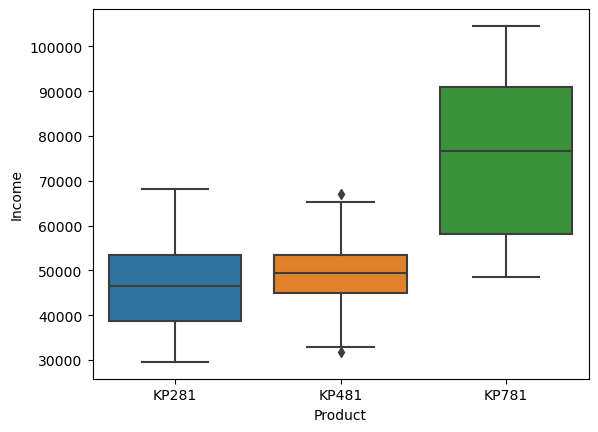

In [20]:
sns.boxplot(x = "Product", y = "Income", data = df) #drawing boxplot to see the variations across each product on different incomes
plt.show()

**Insights:**
1. High income group buying KP781

<function matplotlib.pyplot.show(close=None, block=None)>

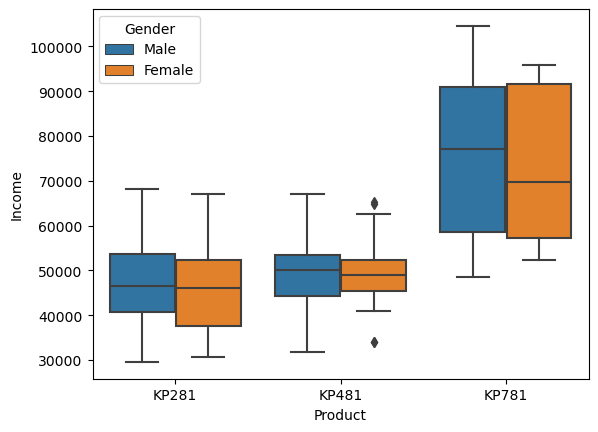

In [21]:
sns.boxplot(x = "Product", y = "Income", hue = "Gender", data = df)
plt.show

**Insights:**

1. Irrespective of gender high income group buying KP781

<function matplotlib.pyplot.show(close=None, block=None)>

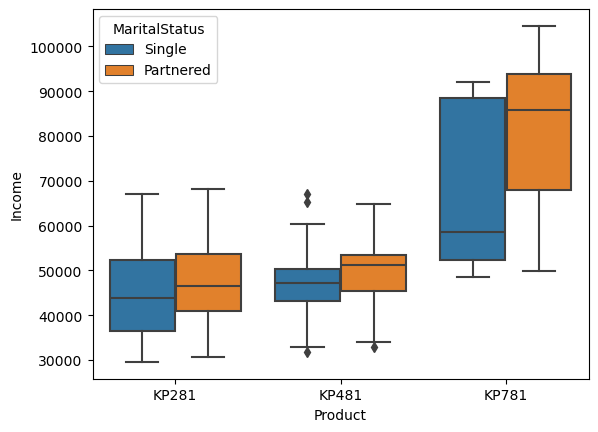

In [22]:
sns.boxplot(x = "Product", y = "Income", hue = "MaritalStatus", data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

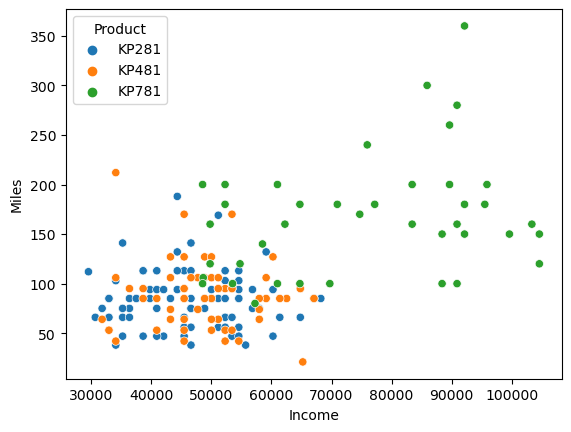

In [23]:
sns.scatterplot(x = "Income", y = "Miles", hue = "Product", data = df)
plt.show

**Insights:**

1. People who are buying KP781 are ruuning more than 100 miles/week

In [24]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

<Axes: >

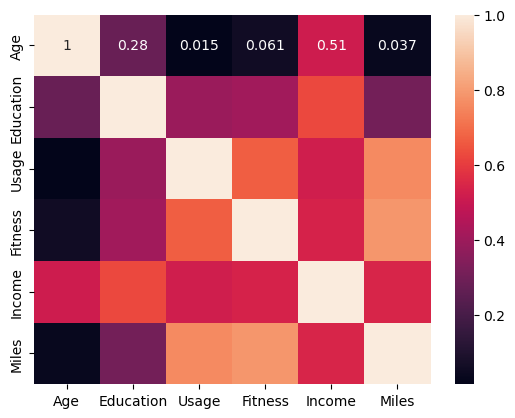

In [25]:
sns.heatmap(df.select_dtypes(include = "int").corr(), annot = True)

In [26]:
a = pd.crosstab(index = df["Gender"], columns = df["Product"])
a

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [27]:
# lets do hypothesis testing ; we need to figure our dependency of Gender on various products
# Ho: Genders have no impact
# Ha: Genders have impact on various products
chi2stat, p_value, dof, exp_freq = chi2_contingency(a)
print(p_value)
print(chi2stat)
print(dof)
print(exp_freq)
if p_value < 0.05:
    print("Genders have impact on various products")
else:
    print("Genders have no impact")

0.0015617972833158714
12.923836032388664
2
[[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
Genders have impact on various products


**Insights:**

1. After having conducted hypothesis tetsing (chi2 test) on whether gender impacting the choice oof product or not, we can draw inference for the population that **Gender does play role on deciding which product to purchase**.

In [28]:
income1 = df[df["Product"] == "KP281"]["Income"]
income2 = df[df["Product"] == "KP481"]["Income"]
income3 = df[df["Product"] == "KP781"]["Income"]

In [29]:
#H0: Products have no preference on income 
#Ha: products preference depends on income groups

_, p_value = f_oneway(income1, income2, income3) # ANOVA testing
print(p_value)
if p_value < 0.5:
    print("Reject H0")
    print("products preference depends on income groups")
else:
    print("Fail to reject Ho")
    print("Products have no preference on income")

1.5644991316342494e-27
Reject H0
products preference depends on income groups


**Insights:**

1. After having conducted hypothesis tetsing (ANOVA test) on income groups across all three product categories, we can draw inference for the population that **products preference depends on income groups.**



In [30]:
age1 = df[df["Product"] == "KP281"]["Age"]
age2 = df[df["Product"] == "KP481"]["Age"]
age3 = df[df["Product"] == "KP781"]["Age"]

In [31]:
#H0: Products have no preference on age 
#Ha: products preference depends on age groups

_, p_value = f_oneway(age1, age2, age3)
print(p_value)
if p_value < 0.5:
    print("Reject H0")
    print("products preference depends on age groups")
else:
    print("Fail to reject Ho")
    print("Products have no preference on age")

0.9101300808730235
Fail to reject Ho
Products have no preference on age


**Insights:**

1. After having conducted hypothesis tetsing (ANOVA test) on age groups across all three product categories, we can draw inference for the population that **Products have no preference on age.**


In [32]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize = "index")*100 # conditional probability

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


**Insights:**

1. Out of the females around 52% buy KP281, 38% buy KP481, and 9% buy KP781
2. Out of the males around 38% buy KP281, 30% buy KP481, and 32% buy KP781

In [33]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize = "columns")*100 # conditional probability

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


**Insights:**

1. Out of all the people who buy KP281 - 50% are females and 50% are males
2. Out of all the people who buy KP481 - 48% are females and 52% are males
3. Out of all the people who buy KP781 - 17% are females and 58% are males

In [34]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], margins = True, normalize = "index")*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671
All,44.444444,33.333333,22.222222


**Insights:**

1. Out of all the perople who are married - 44% buy KP281
2. Out of all the perople who are married - 33% buy K4281
3. Out of all the perople who are married - 23% buy KP781

In [35]:
b = pd.crosstab(index = df["MaritalStatus"], columns = df["Product"])
b

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [45]:
# lets do hypothesis testing ; we need to figure our dependency of Gender on various products
# Ho: MaritalStatus have no impact
# Ha: MaritalStatus have impact on preference of the various products
chi2stat, p_value, dof, exp_freq = chi2_contingency(b)
print(chi2stat)
print(dof)
print(exp_freq)
if p_value < 0.05:
    print("MaritalStatus have impact on preferance of the various products")
else:
    print("MaritalStatus have no impact")

0.0806554858532839
2
[[47.55555556 35.66666667 23.77777778]
 [32.44444444 24.33333333 16.22222222]]
MaritalStatus have no impact


**Insights:**

1. After having conducted hypothesis tetsing (chi2 test) on marital status groups across all product categories, we can draw inference for the population that **Marital status has no impact on purchasing the product.**

In [37]:
#Adding New columns for better analysis
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ["Young Adults", "Adults", "Middle Aged Adults", "Elderly"]
df["new_age"] = pd.cut(df["Age"], bins = bin_range1, labels = bin_labels1) #binning the age value into categories.

bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ["Primary Education", "Secondary Education", "Higher Education"] 
df["new_education"] = pd.cut(df["Education"], bins = bin_range2, labels = bin_labels2) #binning the education into categories

bin_range3 = [0, 40000, 60000, 80000, float('inf')]
bin_labels3 = ["Low Income", "Moderate Income", "High Income", "Very High Income"]
df["new_income"] = pd.cut(df["Income"], bins = bin_range3, labels = bin_labels3) #binning the income into categories


bin_range4 = [0, 50, 100, 200, float('inf')]
bin_labesl4 = ["Light Activity", "Moderate Activity", "Active Lifestyle", "Fitness Enthusiast"]
df["new_miles"] = pd.cut(df["Income"], bins = bin_range3, labels = bin_labels3) #binning the income into categories


df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,new_age,new_education,new_income,new_miles
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Low Income


In [38]:
df["new_age"].value_counts()

new_age
Young Adults          79
Adults                73
Middle Aged Adults    22
Elderly                6
Name: count, dtype: int64

In [39]:
df["Age"].value_counts().head()

Age
25    25
23    18
24    12
26    12
28     9
Name: count, dtype: int64

<Axes: >

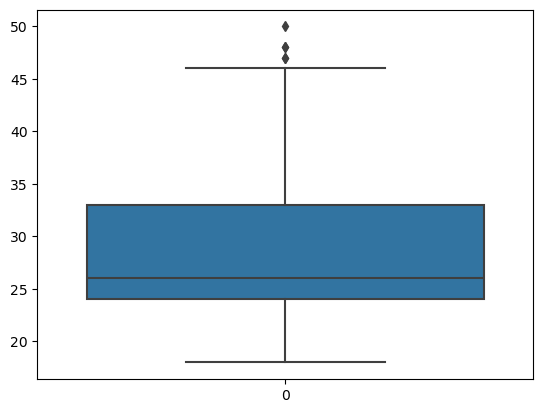

In [40]:
sns.boxplot(df["Age"])

In [41]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,new_age,new_education,new_income,new_miles
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Low Income


<Axes: xlabel='Usage', ylabel='Income'>

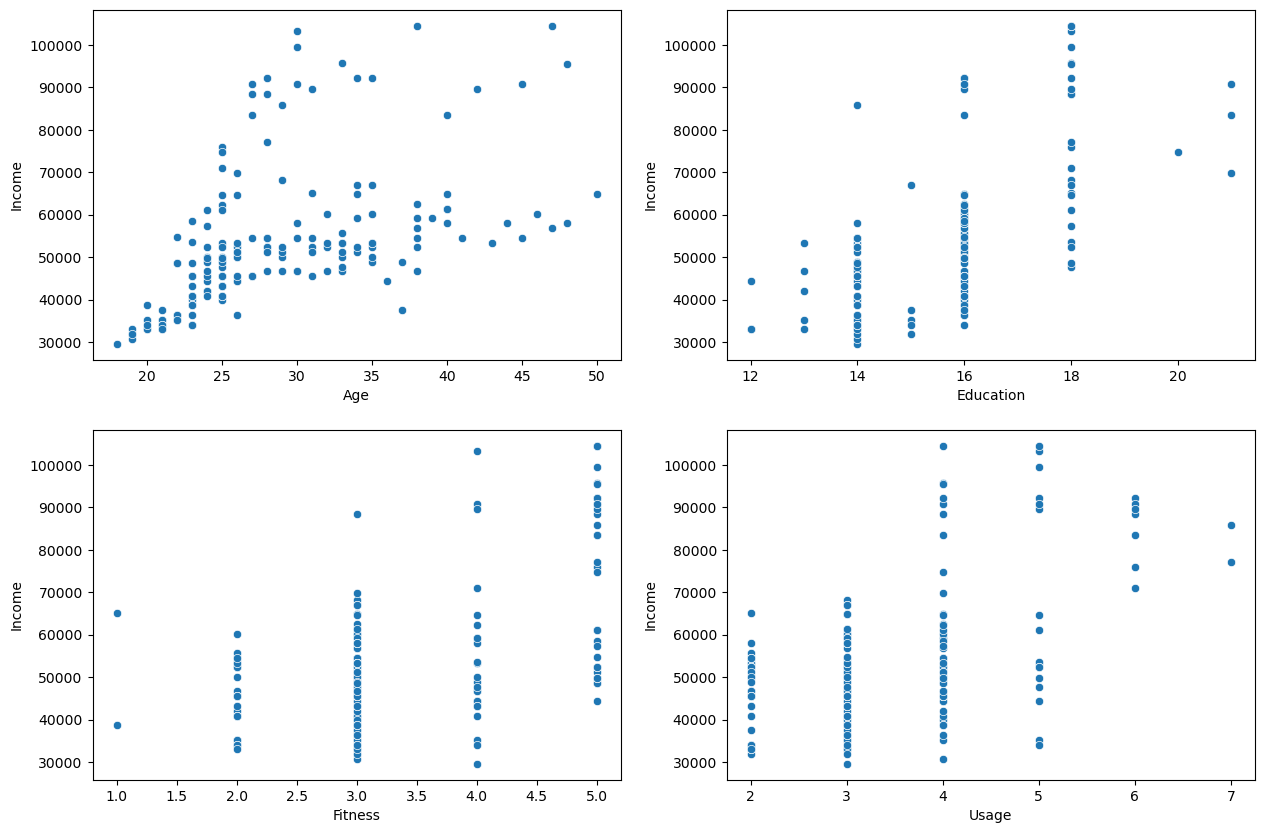

In [42]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = "Age", y = "Income", data = df)

plt.subplot(2,2,2)
sns.scatterplot(x = "Education", y = "Income", data = df)


plt.subplot(2,2,3)
sns.scatterplot(x = "Fitness", y = "Income", data = df)

plt.subplot(2,2,4)
sns.scatterplot(x = "Usage", y = "Income", data = df)

findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.


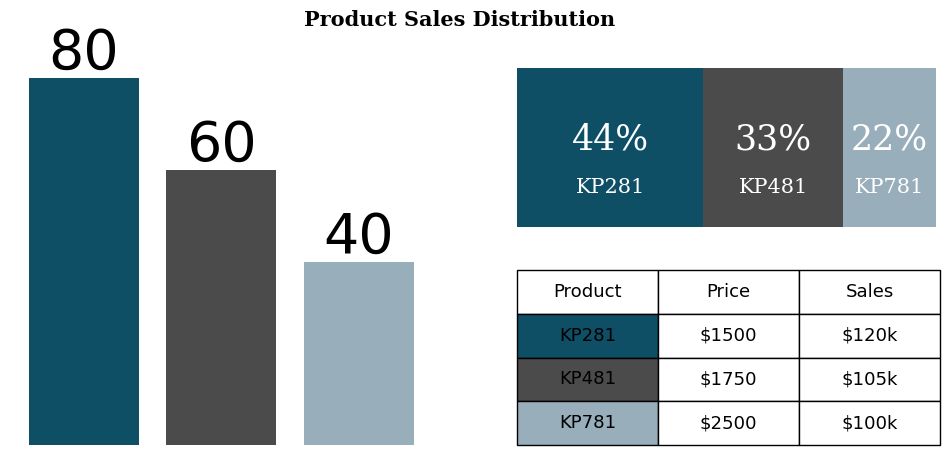

In [43]:
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)


ax0 = fig.add_subplot(gs[:,0])
product_count = df["Product"].value_counts()
color_map = ["#0e4f66", "#4b4b4c", "#99AEBB"]
ax0.bar(product_count.index, product_count.values, color = color_map)


for i in product_count.index:
    ax0.text(i, product_count[i]+2, product_count[i], {"font":"calibri", "size": 40}, ha = "center")
    
    
ax0.grid(color = "black", linestyle = "--", axis = "y", zorder = 0, dashes = (5,10))
ax0.axis("off")

#cerating a plot for product % sale

ax1 = fig.add_subplot(gs[0,1])
product_count["percent"] = ((product_count.values/df.shape[0])*100).round()
ax1.barh(product_count.index[0], product_count.loc["percent"][0], color = "#0e4f66")
ax1.barh(product_count.index[0], product_count.loc["percent"][1], left = product_count.loc["percent"][0], color = "#4b4b4c")
ax1.barh(product_count.index[0], product_count.loc["percent"][2], left = product_count.loc["percent"][0] + 
         product_count.loc["percent"][1], color = "#99AEBB")
ax1.set(xlim = (0,100))


product_count['info_percent'] =[product_count['percent'][0]/2,product_count['percent'][0] + product_count['percent'][1]/2,
                                 product_count['percent'][0] + product_count['percent'][1] + product_count['percent'][2]/2]

for i in range(3):
    ax1.text(product_count['info_percent'][i],0.04,f"{product_count['percent'][i]:.0f}%",
             va = 'center', ha='center',fontsize=25, fontweight='light', fontfamily='serif',color='white')

    ax1.text(product_count['info_percent'][i],-0.2,product_count.index[i],
             va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax1.axis("off")


ax2 = fig.add_subplot(gs[1,1])

product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]
color_2d = [['#0e4f66','#FFFFFF','#FFFFFF'],['#4b4b4c','#FFFFFF','#FFFFFF'],['#99AEBB','#FFFFFF','#FFFFFF']]

table = ax2.table(cellText = product_portfolio, cellColours=color_2d, cellLoc='center',colLabels =['Product','Price','Sales'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax2.axis('off')

#adding title to the visual
fig.suptitle('Product Sales Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})
plt.show()


Text(0.5, 1.0, 'MaritalStatus Distribution')

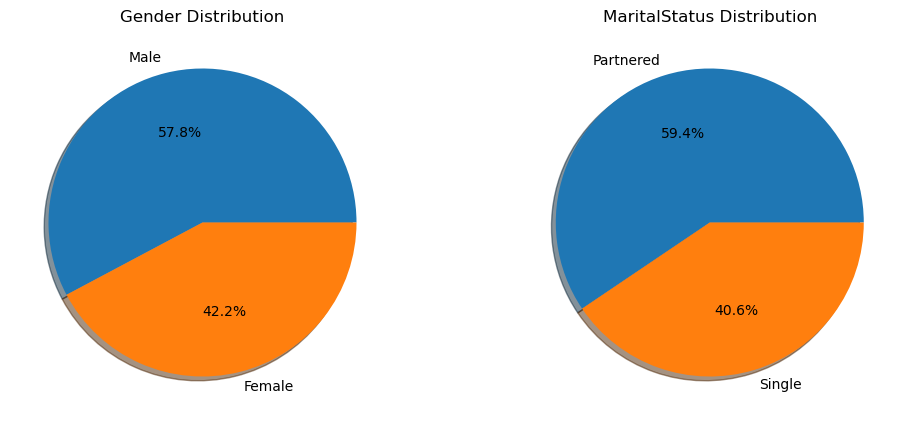

In [44]:
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.pie(df["Gender"].value_counts().values, labels = df["Gender"].value_counts().index, autopct = "%.1f%%", shadow = True)

ax0.set_title("Gender Distribution")

ax1 = fig.add_subplot(gs[0,1])
ax1.pie(df["MaritalStatus"].value_counts().values, labels = df["MaritalStatus"].value_counts().index, autopct = "%.1f%%", shadow  = True)

ax1.set_title("MaritalStatus Distribution")



**Customer Profiling:**

Based on above analysis
1. Probability of purchase of KP281 = 44%
2. Probability of purchase of KP481 = 33%
3. Probability of purchase of KP781 = 22%

Customer Profile for KP281 Treadmill:
1. Age of customer mainly between 18 to 35 years with few between 35 to 50 years
2. Education level of customer 13 years and above
3. Annual Income of customer below USD 60,000
4. Weekly Usage - 2 to 4 times
5. Fitness Scale - 2 to 4   
6. Weekly Running Mileage - 50 to 100 miles
   
Customer Profile for KP481 Treadmill:
1. Age of customer mainly between 18 to 35 years with few between 35 to 50 years
2. Education level of customer 13 years and above
3. Annual Income of customer between USD 40,000 to USD 80,000
4. Weekly Usage - 2 to 4 times
5. Fitness Scale - 2 to 4
6. Weekly Running Mileage - 50 to 200 miles
   
Customer Profile for KP781 Treadmill:
1. Gender - Male
2. Age of customer between 18 to 35 years
3. Education level of customer 15 years and above
4. Annual Income of customer USD 80,000 and above
5. Weekly Usage - 4 to 7 times
6. Fitness Scale - 3 to 5
7. Weekly Running Mileage - 100 miles and above

**Recommendations:**

Marketing Campaigns for KP781:

The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

Affordable Pricing and Payment Plans:

Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

User-Friendly App Integration:

Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.